# Cognitive Age Prediction with Structural and Functional MRI

In [18]:
import pandas as pd

from camcan.utils import run_ridge, plot_pred, plot_learning_curve, plot_barchart, StackingRegressor

%matplotlib inline

In [2]:
CV = 10
# store mae, std for the summary plot
mae_std = {}

## Structural MRI

### Read Data

In [3]:
# read information about subjects
subjects_data = pd.read_csv('../../data/participant_data.csv', index_col=0)

subjects_data.head()

,age,hand,gender_text,gender_code,tiv_cubicmm,cbuid700,cbuid280_sess1,cbuid280_sess2,cbuid280_sess3,cbuid280_sess4,profilecode,profilecode_numeric
Observations,,,,,,,,,,,,
CC110033,24,90.0,MALE,1,1413746.0,CBU120746,NaN,NaN,NaN,NaN,NaN,NaN
CC110037,18,89.0,MALE,1,1386581.0,CBU110544,NaN,NaN,NaN,NaN,NaN,NaN
CC110045,24,100.0,FEMALE,2,1385355.0,CBU111116,NaN,NaN,NaN,NaN,NaN,NaN
CC110056,22,100.0,FEMALE,2,1286849.0,CBU110547,NaN,CBU140153,CBU140224,NaN,D,1.0
CC110062,20,58.0,MALE,1,1582719.0,CBU110468,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# read features

area_data = pd.read_hdf('../../data/structural/structural_data.h5', 
                           key='area')
thickness_data = pd.read_hdf('../../data/structural/structural_data.h5',
                               key='thickness')
volume_data = pd.read_hdf('../../data/structural/structural_data.h5',
                            key='volume')

volume_data.head()

/home/okozyn/anaconda3/envs/mne/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus-Proper,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,4th-Ventricle,...,SupraTentorialVol,SupraTentorialVolNotVent,SupraTentorialVolNotVentVox,MaskVol,BrainSegVol-to-eTIV,MaskVol-to-eTIV,lhSurfaceHoles,rhSurfaceHoles,SurfaceHoles,EstimatedTotalIntraCranialVol
Measure:volume,,,,,,,,,,,,,,,,,,,,,
CC310256,16443.3,215.0,14808.5,56803.4,7378.4,3956.5,5018.7,2464.6,1684.8,2822.3,...,1.194657e+06,1.160384e+06,1158424.0,1847752.0,0.718849,0.988205,16.0,7.0,23.0,1.869806e+06
CC110033,6018.2,145.2,13938.6,56055.7,8523.9,3604.6,4557.6,2008.8,971.2,1426.7,...,1.030259e+06,1.014403e+06,1011785.0,1596489.0,0.757157,1.029559,41.0,23.0,64.0,1.550654e+06
CC110037,5150.4,226.8,14923.5,59652.3,7732.1,3223.5,4647.4,2154.4,773.3,1478.8,...,1.032711e+06,1.022294e+06,1019858.0,1618468.0,0.782415,1.072228,19.0,30.0,49.0,1.509444e+06
CC110098,6299.5,269.5,14468.0,59900.4,7368.8,3976.3,5239.7,1884.4,880.3,1790.9,...,1.091133e+06,1.079604e+06,1076145.0,1732368.0,0.740368,1.031667,12.0,28.0,40.0,1.679193e+06
CC110126,2711.6,352.6,16216.5,57535.4,7946.3,3431.7,4875.8,1994.7,726.2,1233.2,...,1.094727e+06,1.088829e+06,1086463.0,1628306.0,0.769026,1.009764,21.0,23.0,44.0,1.612561e+06


In [5]:
area_data = area_data.dropna()
thickness_data = thickness_data.dropna()
volume_data = volume_data.dropna()

### Training and Prediction

#### Area

MAE: 10.99
MAE STD: 1.08


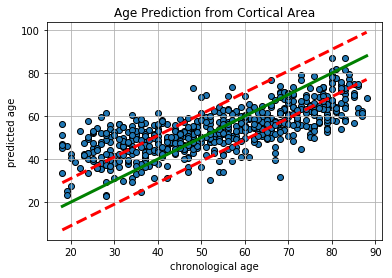

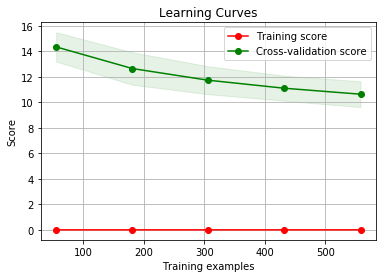

In [6]:
y, y_pred, arr_mae, arr_r2, train_sizes, train_scores, test_scores, _ = \
    run_ridge(area_data, subjects_data, cv=CV)

arr_mae = -arr_mae
mae = arr_mae.mean()
std = arr_mae.std()

print('MAE: %.2f' % mae)
print('MAE STD: %.2f' % std)

mae_std['Cortical Surface Area'] = (mae, std)

plot_pred(y, y_pred, mae, title='Age Prediction from Cortical Area')
plot_learning_curve(train_sizes, train_scores, test_scores)

#### Thickness

MAE: 7.71
MAE STD: 0.67


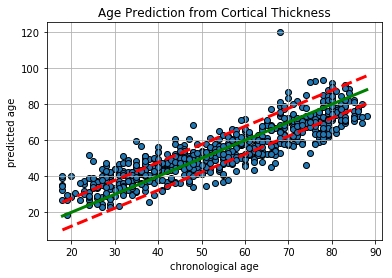

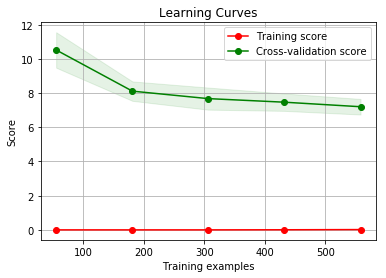

In [7]:
y, y_pred, arr_mae, arr_r2, train_sizes, train_scores, test_scores, _ \
    = run_ridge(thickness_data, subjects_data, cv=CV)

arr_mae = -arr_mae
mae = arr_mae.mean()
std = arr_mae.std()

print('MAE: %.2f' % mae)
print('MAE STD: %.2f' % std)

mae_std['Cortical Thickness'] = (mae, std)

plot_pred(y, y_pred, mae, title='Age Prediction from Cortical Thickness')
plot_learning_curve(train_sizes, train_scores, test_scores)

#### Volume

MAE: 6.79
MAE STD: 0.60


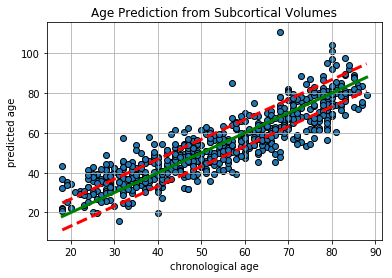

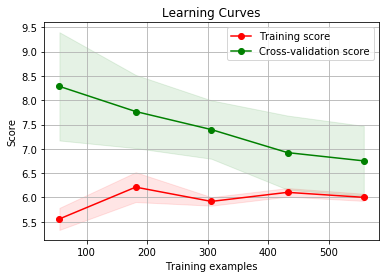

In [8]:
y, y_pred, arr_mae, arr_r2, train_sizes, train_scores, test_scores, sbjs \
    = run_ridge(volume_data, subjects_data, cv=CV)

arr_mae = -arr_mae
mae = arr_mae.mean()
std = arr_mae.std()

print('MAE: %.2f' % mae)
print('MAE STD: %.2f' % std)

mae_std['Subcortical Volumes'] = (mae, std)

plot_pred(y, y_pred, mae, title='Age Prediction from Subcortical Volumes')
plot_learning_curve(train_sizes, train_scores, test_scores)

## Functional MRI

### BASC 197

In [9]:
# read connectivity data
connect_data_tangent = pd.read_hdf('../../data/connectivity/connect_data_tangent.h5',
                              key='basc197')
connect_data_r2z = pd.read_hdf('../../data/connectivity/connect_data_correlation.h5',
                              key='basc197')
connect_data_tangent.head()

,0,1,2,3,4,5,6,7,8,9,...,19493,19494,19495,19496,19497,19498,19499,19500,19501,19502
CC110033,0.096697,-0.140008,0.067199,-0.013200,0.040234,-0.163020,-0.029214,0.156358,0.078821,0.087680,...,-0.037457,0.044814,0.021185,-0.036576,-0.054100,-0.002762,0.053630,0.022528,-0.006503,0.273724
CC110037,-0.591520,-0.088332,-0.723872,0.101235,-0.012502,-0.854274,0.029541,0.023450,-0.067513,-1.492769,...,-0.067943,-0.124460,-0.034104,-0.103519,0.098355,-0.021281,0.136260,-0.073003,0.048019,-0.070249
CC110045,-0.042581,-0.176352,-0.037048,0.141138,-0.055788,-0.007159,0.041272,0.144073,-0.075119,0.061303,...,0.037748,-0.021896,0.097779,0.053294,0.060940,-0.000433,-0.062330,-0.039093,0.033913,-0.148330
CC110069,-0.442311,-0.079525,-0.141859,0.023382,-0.061421,-0.358688,0.069646,-0.011345,0.072415,0.156324,...,0.035603,-0.036768,-0.023163,0.023483,-0.037131,-0.039623,-0.011263,0.056086,-0.144799,-0.178823
CC110087,-0.097007,-0.133572,0.074754,0.099027,-0.034863,-0.310058,0.031366,-0.022870,0.071330,-0.108389,...,-0.073019,-0.152082,0.123719,-0.041476,0.067740,0.094479,0.045866,0.040174,-0.045647,0.129202


#### Tangent Space

MAE: 6.10
MAE STD: 0.50


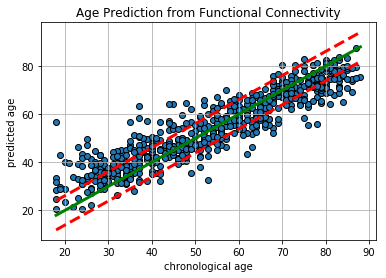

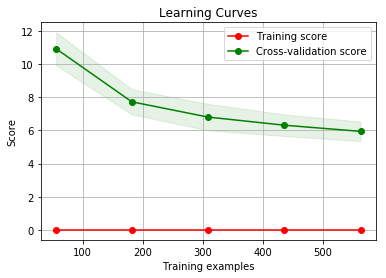

In [10]:
y, y_pred, arr_mae, arr_r2, train_sizes, train_scores, test_scores, _ \
    = run_ridge(connect_data_tangent, subjects_data, cv=CV)

arr_mae = -arr_mae
mae = arr_mae.mean()
std = arr_mae.std()

print('MAE: %.2f' % mae)
print('MAE STD: %.2f' % std)

mae_std['Connectivity Matrix, BASC 197 tan'] = (mae, std)

plot_pred(y, y_pred, mae, title='Age Prediction from Functional Connectivity')
plot_learning_curve(train_sizes, train_scores, test_scores)

#### Connectivity with Fisher's r-to-z Transform

MAE: 6.85
MAE STD: 0.62


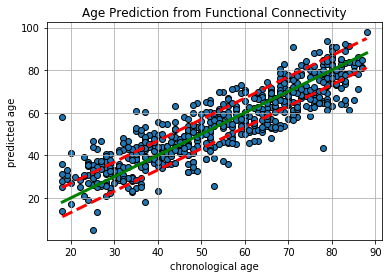

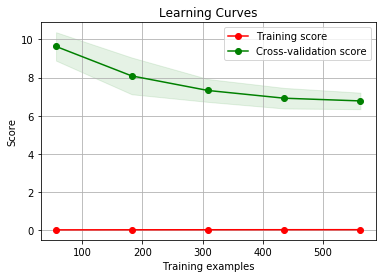

In [12]:
y, y_pred, arr_mae, arr_r2, train_sizes, train_scores, test_scores, _ \
    = run_ridge(connect_data_r2z, subjects_data, cv=CV)

arr_mae = -arr_mae
mae = arr_mae.mean()
std = arr_mae.std()

print('MAE: %.2f' % mae)
print('MAE STD: %.2f' % std)

mae_std['Connectivity Matrix, BASC 197 r2z'] = (mae, std)

plot_pred(y, y_pred, mae, title='Age Prediction from Functional Connectivity')
plot_learning_curve(train_sizes, train_scores, test_scores)

### MODL 256

In [13]:
# read connectivity data
connect_data_tangent = pd.read_hdf('../../data/connectivity/connect_data_tangent.h5',
                              key='modl256')
connect_data_r2z = pd.read_hdf('../../data/connectivity/connect_data_correlation.h5',
                              key='modl256')
connect_data_tangent.head()

,0,1,2,3,4,5,6,7,8,9,...,32886,32887,32888,32889,32890,32891,32892,32893,32894,32895
CC110033,0.074408,-0.018078,-0.026110,-0.035737,0.026987,-0.148206,-0.123741,0.043818,-0.007511,0.028245,...,0.033294,0.047502,0.026974,-0.018982,0.119100,0.139546,-0.001772,0.049109,0.009093,-0.208286
CC110037,-1.691638,-0.026637,-0.530353,0.047946,-0.010420,-1.973813,-0.068899,-0.057347,-0.048387,0.615105,...,-0.008444,-0.012884,0.050008,0.042905,0.058089,-0.024558,0.064888,-0.070759,0.024871,-1.646669
CC110045,0.129928,0.083970,-0.255726,-0.051040,0.090631,-0.166786,0.005209,0.121638,-0.003998,-0.167915,...,-0.010775,-0.043265,0.014613,-0.004538,-0.020235,0.050549,0.285926,-0.061542,0.206019,0.149908
CC110069,-0.155261,-0.004314,-0.298256,-0.103225,0.001456,-0.616323,-0.002113,0.057129,-0.043140,0.176846,...,-0.032800,0.072003,-0.247339,0.149980,-0.059462,-0.071107,-0.107166,0.025952,-0.043589,0.311891
CC110087,-0.304658,-0.012165,-0.093857,0.011350,0.101019,-0.086796,-0.099032,-0.083703,-0.038678,0.065644,...,0.035628,-0.133997,0.058017,-0.014234,-0.035109,-0.067293,-0.054121,-0.024550,-0.095122,-0.023328


#### Tangent Space

MAE: 5.87
MAE STD: 0.81


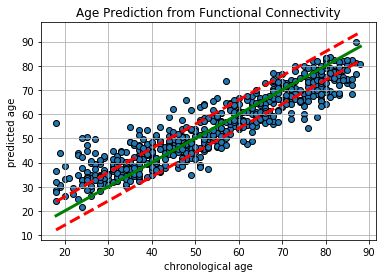

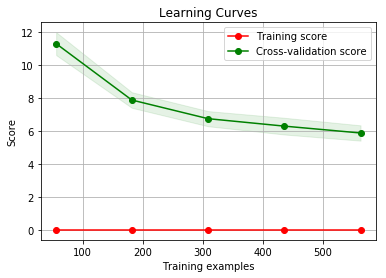

In [14]:
y, y_pred, arr_mae, arr_r2, train_sizes, train_scores, test_scores, _ \
    = run_ridge(connect_data_tangent, subjects_data, cv=CV)

arr_mae = -arr_mae
mae = arr_mae.mean()
std = arr_mae.std()

print('MAE: %.2f' % mae)
print('MAE STD: %.2f' % std)

mae_std['Connectivity Matrix, MODL 256 tan'] = (mae, std)

plot_pred(y, y_pred, mae, title='Age Prediction from Functional Connectivity')
plot_learning_curve(train_sizes, train_scores, test_scores)

#### Connectivity with Fisher's r-to-z Transform

MAE: 5.77
MAE STD: 0.42


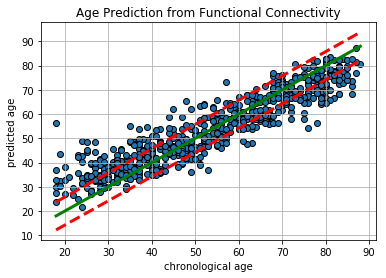

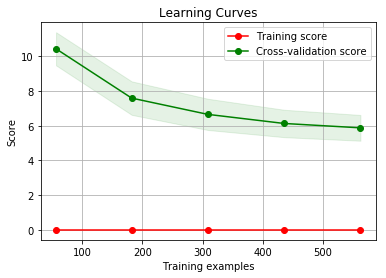

In [15]:
y, y_pred, arr_mae, arr_r2, train_sizes, train_scores, test_scores, _ \
    = run_ridge(connect_data_tangent, subjects_data, cv=CV)

arr_mae = -arr_mae
mae = arr_mae.mean()
std = arr_mae.std()

print('MAE: %.2f' % mae)
print('MAE STD: %.2f' % std)

mae_std['Connectivity Matrix, MODL 256 r2z'] = (mae, std)

plot_pred(y, y_pred, mae, title='Age Prediction from Functional Connectivity')
plot_learning_curve(train_sizes, train_scores, test_scores)

## Stacking

What to do:

1. Combine all the data into one big matrix, note the range of features in each vector
2. Create pipeline object for each classiffier, which should use unitary transform columns that only extracts required features
3. All these should be trained and evaluated. Use Guillaume's code for classifiers.

### Anatomy

In [22]:
# area_data, volume_data, thickness_data
anatomy_data = pd.concat([area_data, thickness_data, volume_data], axis=1, join='inner')

In [24]:
print(anatomy_data.shape)
print(area_data.shape, thickness_data.shape, volume_data.shape)

(621, 10311)
(621, 5124) (621, 5124) (621, 63)


In [54]:
# Parameters and code for stacking from Liem paper
# https://github.com/fliem/LeiCA_LIFE/blob/e9d02464a9e43b97cef9c7b753d88120cfbd6c94/learning/learning_stacking_utils.py#L30

In [53]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_absolute_error, explained_variance_score, r2_score
from sklearn.model_selection import (cross_val_score, cross_val_predict, learning_curve, ShuffleSplit,
                                     train_test_split)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

from sklearn.compose import ColumnTransformer

# ********** delete it later ******** 
alphas = None
train_sizes = None
data = pd.concat([area_data, thickness_data, volume_data], axis=1, join='inner')
cv = CV
# ***********************************


if alphas is None:
    alphas = np.logspace(start=-3, stop=1, num=50, base=10.0)
if train_sizes is None:
    train_sizes = np.linspace(.1, 1.0, 5)
    
_, area_col = area_data.shape
_, thickness_col = thickness_data.shape
_, volume_col = volume_data.shape

# prepare data, subjects age
data_rnd = data.sample(frac=1)
subjects = data_rnd.index.values
y = subjects_data.loc[data_rnd.index.values].age.values
X = data_rnd.values

cv_ss = ShuffleSplit(n_splits=cv, random_state=42)

ct_area = ColumnTransformer([('pass_area', 'passthrough', slice(0, area_col)),
                             ('drop_thickness', 'drop', slice(area_col, area_col + thickness_col)),
                             ('drop_volume', 'drop', slice(area_col + thickness_col,
                                                           area_col + thickness_col + volume_col))])
ct_thickness = ColumnTransformer([('drop_area', 'drop', slice(0, area_col)),
                                  ('pass_thickness', 'passthrough', slice(area_col, area_col + thickness_col)),
                                  ('drop_volume', 'drop', slice(area_col + thickness_col,
                                                                area_col + thickness_col + volume_col))])
ct_volume = ColumnTransformer([('drop_area', 'drop', slice(0, area_col)),
                               ('drop_thickness', 'drop', slice(area_col, area_col + thickness_col)),
                               ('pass_volume', 'passthrough', slice(area_col + thickness_col,
                                                                    area_col + thickness_col + volume_col))])
# RidgeCV(alphas)
estimators = [
    ('reg_area', make_pipeline(ct_area, StandardScaler(), Ridge(0.5))),
    ('reg_thickness', make_pipeline(ct_thickness, StandardScaler(), Ridge(0.5))),
    ('reg_volume', make_pipeline(ct_volume, StandardScaler(), Ridge(0.5)))
]

clf = StackingRegressor(estimators=estimators,
                        final_estimator=RandomForestRegressor(n_estimators=10, random_state=42),
                        cv=cv_ss, random_state=42)


# mae = cross_val_score(clf, X, y, scoring='neg_mean_absolute_error', cv=cv_ss)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42)

out = clf.fit(X_train, y_train).score(X_test, y_test)
# r2 = cross_val_score(clf, X, y, scoring='r2', cv=cv_ss)
# y_pred = cross_val_predict(clf, X, y, cv=cv_ss)

# train_sizes, train_scores, test_scores = \
#     learning_curve(reg, X, y, cv=cv, train_sizes=train_sizes, scoring="neg_mean_absolute_error")

ValueError: cross_val_predict only works for partitions

In [49]:
y.shape

(621,)

In [34]:
   >>> from sklearn.datasets import load_iris
    >>> X, y = load_iris(return_X_y=True)
    >>> from sklearn.linear_model import LogisticRegression
    >>> from sklearn.svm import LinearSVC
    >>> from sklearn.ensemble import RandomForestClassifier
    >>> from sklearn.ensemble import StackingClassifier
    >>> estimators = [
    ...     ('lr', LogisticRegression(solver='lbfgs', multi_class='auto',
    ...                               tol=1e-1)),
    ...     ('svr', LinearSVC(tol=1e-1, random_state=42))
    ... ]
    >>> clf = StackingClassifier(
    ...     estimators=estimators,
    ...     final_estimator=RandomForestClassifier(n_estimators=10,
    ...                                            random_state=42),
    ...     cv=5,
    ... )
    >>> from sklearn.model_selection import train_test_split
    >>> X_train, X_test, y_train, y_test = train_test_split(
    ... X, y, stratify=y, random_state=42
    ... )
    >>> clf.fit(X_train, y_train).score(X_test, y_test) # doctest: +ELLIPSIS
    0...

621

## Summary

### Results from Liem2016

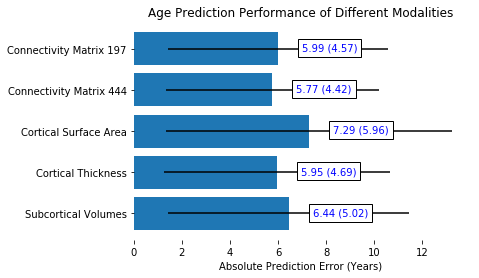

In [16]:
mae_std_liem = {"Connectivity Matrix 197": (5.99, 4.57),
                "Connectivity Matrix 444": (5.77, 4.42),
                "Cortical Thickness": (5.95, 4.69),
                "Cortical Surface Area": (7.29, 5.96),
                "Subcortical Volumes": (6.44, 5.02)}
plot_barchart(mae_std_liem, bar_text_indent=1)

### Results for CamCAN

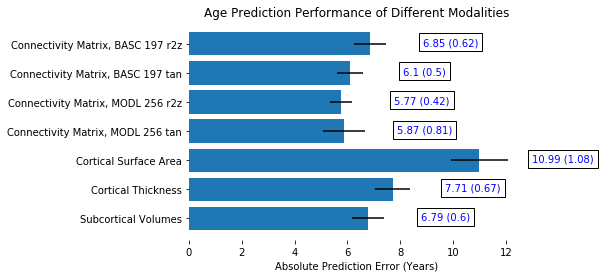

In [17]:
plot_barchart(mae_std)